# Firefly Algorithm Visualization

Interactive notebook để visualize kết quả của thuật toán Firefly Algorithm.

## Setup

In [1]:
import sys
import os

# Add parent directory to path
sys.path.append(os.path.dirname(os.path.abspath('')))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Import framework
from src.problems.continuous.sphere import SphereProblem
from src.problems.continuous.rastrigin import RastriginProblem
from src.problems.discrete.tsp import TSPProblem
from src.swarm.fa import FireflyContinuousOptimizer, FireflyDiscreteTSPOptimizer
from src.classical.hill_climbing import HillClimbingOptimizer
from src.classical.simulated_annealing import SimulatedAnnealingOptimizer
from src.classical.genetic_algorithm import GeneticAlgorithmOptimizer

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ Setup complete!")

✓ Setup complete!


## 1. Firefly Algorithm trên Hàm Sphere (2D)

Visualize quá trình tối ưu trên hàm Sphere 2 chiều.

In [2]:
# Run FA on 2D Sphere
problem = SphereProblem(dim=2)
optimizer = FireflyContinuousOptimizer(
    problem=problem,
    n_fireflies=20,
    alpha=0.2,
    beta0=1.0,
    gamma=1.0,
    seed=42
)

best_sol, best_fit, history, trajectory = optimizer.run(max_iter=50)

print(f"Best fitness: {best_fit:.6f}")
print(f"Best solution: {best_sol}")
print(f"Improvement: {history[0] - history[-1]:.6f}")

Best fitness: 0.000017
Best solution: [-0.00346151  0.00225514]
Improvement: 1.967604


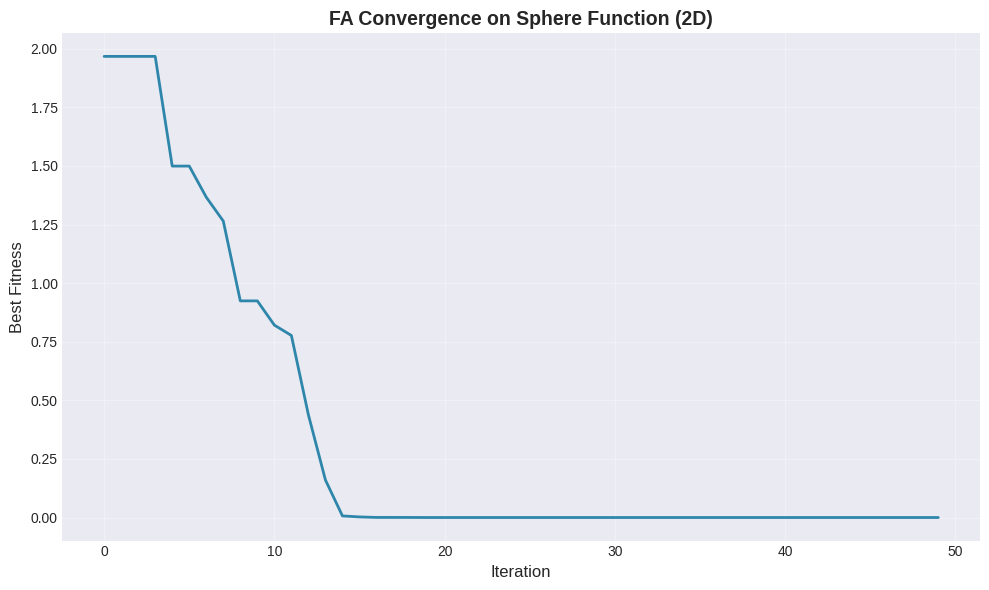

In [3]:
# Plot convergence curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history, linewidth=2, color='#2E86AB')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Best Fitness', fontsize=12)
ax.set_title('FA Convergence on Sphere Function (2D)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

AttributeError: 'SphereProblem' object has no attribute 'bounds'

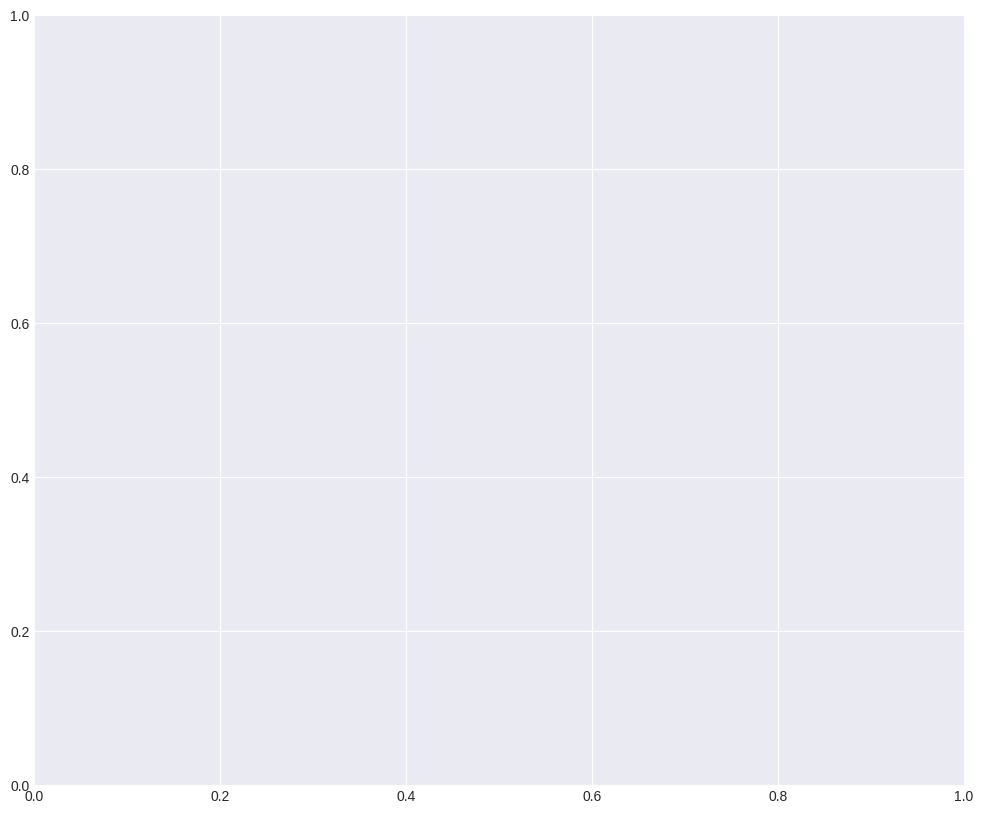

In [ ]:
# Visualize trajectory on contour plot
fig, ax = plt.subplots(figsize=(12, 10))

# Create contour plot of Sphere function
# Use default bounds for Sphere function (usually [-5, 5])
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Plot firefly trajectories
for firefly_idx in range(trajectory[0].shape[0]):
    path = np.array([pop[firefly_idx, :] for pop in trajectory])
    ax.plot(path[:, 0], path[:, 1], 'o-', alpha=0.5, linewidth=1, markersize=3)
    
    # Mark start and end
    ax.scatter(path[0, 0], path[0, 1], c='green', s=100, marker='o', 
              alpha=0.8, edgecolors='black', linewidth=2, zorder=5)
    ax.scatter(path[-1, 0], path[-1, 1], c='red', s=150, marker='*', 
              alpha=0.9, edgecolors='black', linewidth=2, zorder=5)

# Mark global optimum
ax.scatter(0, 0, c='gold', s=200, marker='X', 
          edgecolors='black', linewidth=2, zorder=10, label='Global Optimum')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Firefly Swarm Movement on Sphere Function', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Firefly Algorithm trên Hàm Rastrigin (2D)

Hàm Rastrigin là multimodal - có nhiều local optima.

In [ ]:
# Run FA on 2D Rastrigin
problem = RastriginProblem(dim=2)
optimizer = FireflyContinuousOptimizer(
    problem=problem,
    n_fireflies=30,
    alpha=0.3,
    beta0=1.0,
    gamma=0.5,
    seed=42
)

best_sol, best_fit, history, trajectory = optimizer.run(max_iter=100)

print(f"Best fitness: {best_fit:.6f}")
print(f"Best solution: {best_sol}")
print(f"Improvement: {history[0] - history[-1]:.6f}")

In [ ]:
# Plot convergence
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history, linewidth=2, color='#A23B72')
ax.axhline(y=0, color='red', linestyle='--', label='Global Optimum', linewidth=2)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Best Fitness', fontsize=12)
ax.set_title('FA Convergence on Rastrigin Function (2D)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize on Rastrigin landscape
fig, ax = plt.subplots(figsize=(12, 10))

# Create contour plot
# Use default bounds or get_bounds() method
x = np.linspace(-5.12, 5.12, 200)  # Rastrigin typical bounds
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

contour = ax.contourf(X, Y, Z, levels=30, cmap='viridis', alpha=0.8)
plt.colorbar(contour, ax=ax, label='Fitness')

# Plot trajectories (sample every 5 iterations)
sample_trajectory = trajectory[::5]
for firefly_idx in range(sample_trajectory[0].shape[0]):
    path = np.array([pop[firefly_idx, :] for pop in sample_trajectory])
    ax.plot(path[:, 0], path[:, 1], 'o-', color='white', alpha=0.6, 
           linewidth=1.5, markersize=4)
    
    ax.scatter(path[0, 0], path[0, 1], c='lime', s=100, marker='o', 
              alpha=0.9, edgecolors='black', linewidth=2, zorder=5)
    ax.scatter(path[-1, 0], path[-1, 1], c='red', s=150, marker='*', 
              alpha=0.9, edgecolors='black', linewidth=2, zorder=5)

# Mark global optimum
ax.scatter(0, 0, c='yellow', s=300, marker='X', 
          edgecolors='black', linewidth=3, zorder=10, label='Global Optimum')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Firefly Swarm on Rastrigin Landscape', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

## 3. So Sánh Các Thuật Toán

So sánh FA với các thuật toán khác trên cùng 1 bài toán.

In [ ]:
# Setup problem
problem = RastriginProblem(dim=5)
max_iter = 100
seed = 42

# Run algorithms
algorithms = {}

print("Running algorithms...")

# Firefly Algorithm
print("  - Firefly Algorithm...")
fa = FireflyContinuousOptimizer(problem, n_fireflies=20, seed=seed)
_, fa_fit, fa_hist, _ = fa.run(max_iter=max_iter)
algorithms['Firefly Algorithm'] = fa_hist

# Simulated Annealing
print("  - Simulated Annealing...")
sa = SimulatedAnnealingOptimizer(problem, initial_temp=100, seed=seed)
_, sa_fit, sa_hist, _ = sa.run(max_iter=max_iter)
algorithms['Simulated Annealing'] = sa_hist

# Hill Climbing
print("  - Hill Climbing...")
hc = HillClimbingOptimizer(problem, num_neighbors=20, seed=seed)
_, hc_fit, hc_hist, _ = hc.run(max_iter=max_iter)
algorithms['Hill Climbing'] = hc_hist

# Genetic Algorithm
print("  - Genetic Algorithm...")
ga = GeneticAlgorithmOptimizer(problem, pop_size=20, seed=seed)
_, ga_fit, ga_hist, _ = ga.run(max_iter=max_iter)
algorithms['Genetic Algorithm'] = ga_hist

print("\n✓ All algorithms completed!")

In [ ]:
# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Linear scale
for idx, (name, history) in enumerate(algorithms.items()):
    ax1.plot(history, label=name, linewidth=2.5, color=colors[idx], alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='--', label='Global Optimum', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Best Fitness', fontsize=12)
ax1.set_title('Algorithm Comparison (Linear Scale)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)

# Log scale
for idx, (name, history) in enumerate(algorithms.items()):
    # Add small offset to avoid log(0)
    history_log = [max(h, 1e-10) for h in history]
    ax2.plot(history_log, label=name, linewidth=2.5, color=colors[idx], alpha=0.8)

ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Best Fitness (log scale)', fontsize=12)
ax2.set_title('Algorithm Comparison (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

In [ ]:
# Summary table
import pandas as pd

summary_data = []
for name, history in algorithms.items():
    summary_data.append({
        'Algorithm': name,
        'Initial Fitness': f"{history[0]:.6f}",
        'Final Fitness': f"{history[-1]:.6f}",
        'Improvement': f"{history[0] - history[-1]:.6f}",
        'Improvement %': f"{100 * (history[0] - history[-1]) / history[0]:.2f}%"
    })

df = pd.DataFrame(summary_data)
print("\nAlgorithm Performance Summary:")
print("=" * 80)
display(df)

## 4. TSP Visualization

In [ ]:
# Create TSP instance
rng = np.random.RandomState(123)
coords = rng.rand(15, 2) * 100
problem = TSPProblem(coords)

# Run FA
optimizer = FireflyDiscreteTSPOptimizer(
    problem=problem,
    n_fireflies=25,
    alpha_swap=0.2,
    max_swaps_per_move=3,
    seed=42
)

best_tour, best_length, history, _ = optimizer.run(max_iter=100)

print(f"Best tour length: {best_length:.2f}")
print(f"Improvement: {history[0] - history[-1]:.2f} ({100*(history[0]-history[-1])/history[0]:.1f}%)")

In [ ]:
# Plot TSP tour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Tour visualization
ax1.scatter(coords[:, 0], coords[:, 1], c='red', s=200, 
           zorder=3, edgecolors='black', linewidth=2)

for i in range(len(best_tour)):
    city_a = best_tour[i]
    city_b = best_tour[(i + 1) % len(best_tour)]
    ax1.plot([coords[city_a, 0], coords[city_b, 0]],
            [coords[city_a, 1], coords[city_b, 1]],
            'b-', linewidth=2.5, alpha=0.7)

for i, (x, y) in enumerate(coords):
    ax1.text(x, y, str(i), fontsize=11, ha='center', va='center',
            color='white', fontweight='bold')

ax1.set_xlabel('X Coordinate', fontsize=12)
ax1.set_ylabel('Y Coordinate', fontsize=12)
ax1.set_title(f'Best TSP Tour (Length: {best_length:.2f})', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Convergence
ax2.plot(history, linewidth=2.5, color='#2E86AB')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Tour Length', fontsize=12)
ax2.set_title('TSP Convergence', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Parameter Sensitivity Analysis

In [ ]:
# Test different gamma values
problem = RastriginProblem(dim=5)
gamma_values = [0.1, 0.3, 0.5, 1.0, 2.0, 5.0, 10.0]
results = {}

print("Testing gamma values...")
for gamma in gamma_values:
    print(f"  gamma = {gamma}...")
    optimizer = FireflyContinuousOptimizer(
        problem=problem,
        n_fireflies=20,
        alpha=0.2,
        beta0=1.0,
        gamma=gamma,
        seed=42
    )
    _, fitness, history, _ = optimizer.run(max_iter=100)
    results[gamma] = (fitness, history)

print("\n✓ Sensitivity analysis complete!")

In [ ]:
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Final fitness vs gamma
gammas = list(results.keys())
final_fitness = [results[g][0] for g in gammas]

ax1.plot(gammas, final_fitness, 'o-', linewidth=2.5, markersize=10, color='#2E86AB')
ax1.set_xlabel('Gamma (Light Absorption)', fontsize=12)
ax1.set_ylabel('Final Fitness', fontsize=12)
ax1.set_title('Parameter Sensitivity: Gamma', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Convergence curves
colors_grad = plt.cm.viridis(np.linspace(0, 1, len(gammas)))
for idx, (gamma, (_, history)) in enumerate(results.items()):
    ax2.plot(history, label=f'γ={gamma}', linewidth=2, 
            color=colors_grad[idx], alpha=0.8)

ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Best Fitness', fontsize=12)
ax2.set_title('Convergence for Different Gamma Values', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9, loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Animation (Optional)

Tạo animation cho swarm movement.

In [ ]:
# Run FA for animation
problem = SphereProblem(dim=2)
optimizer = FireflyContinuousOptimizer(
    problem=problem,
    n_fireflies=20,
    alpha=0.2,
    beta0=1.0,
    gamma=1.0,
    seed=42
)

best_sol, best_fit, history, trajectory = optimizer.run(max_iter=50)

# Create animation
fig, ax = plt.subplots(figsize=(10, 10))

# Setup contour
x = np.linspace(-5, 5, 100)  # Use default bounds
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.scatter(0, 0, c='gold', s=300, marker='X', edgecolors='black', 
          linewidth=3, zorder=10, label='Optimum')

# Initialize scatter plot for fireflies
scatter = ax.scatter([], [], c='red', s=100, alpha=0.8, 
                    edgecolors='black', linewidth=2)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend()

title = ax.text(0.5, 1.05, '', transform=ax.transAxes, 
               ha='center', fontsize=14, fontweight='bold')

def animate(frame):
    positions = trajectory[frame]
    scatter.set_offsets(positions)
    title.set_text(f'Iteration {frame} | Best Fitness: {history[frame]:.4f}')
    return scatter, title

anim = FuncAnimation(fig, animate, frames=len(trajectory), 
                    interval=100, blit=True, repeat=True)

plt.close()  # Prevent duplicate display

# Display animation
HTML(anim.to_jshtml())

## Summary

Notebook này đã demo:
- ✓ Convergence curves
- ✓ Trajectory visualization trên contour plots
- ✓ Algorithm comparison
- ✓ TSP tour visualization
- ✓ Parameter sensitivity analysis
- ✓ Animation (optional)

Bạn có thể chỉnh sửa các cell để:
- Thay đổi parameters
- Test các problems khác
- Thêm algorithms mới
- Customize plots